#                                               Appendix

In [453]:
import pandas as  pd 
import numpy as np
import os 
import matplotlib.pyplot as plt

In [454]:
authors = ["CharlesDickens","JaneAustin","MarkTwain"]
genre = ["Horror","Fiction","Adventure"]

author_text_list = []
for aa in range(0,len(authors)):
    for rr in range(1,len(authors)+1):
        
     filename = authors[aa]+"_"+str(rr)+".txt"
     author_text_list.append(filename)
    
genre_text_list =[]
for gg in range(0,len(genre)):
     for rr in range(1,len(genre)+1):
       filename=genre[gg]+"_"+str(rr)+".txt"
       genre_text_list.append(filename)

In [455]:
author_path_list = []
genre_path_list = []
cur_dir = os.getcwd()

for aa in range(0,len(author_text_list)):
    author_path_list.append(os.path.join(cur_dir, author_text_list[aa]))

for gg in range(0,len(genre_text_list)):
    genre_path_list.append(os.path.join(cur_dir, genre_text_list[gg]))
        

In [456]:
fix_dictionary = {" isn't":" is not ", " isn’t ": "is not", " don't ":" do not ",\
                  "don’t": " do not ","would'nt":" would not","would’t":" would not ","aren't":"are not",\
                  "aren’t":"are not", "can't":"can not", "can’t": "can not", " won't" : " will not", " won’t ": " will not " ,\
                  "had'nt":"had not", " hadn’t ": " had not " ,  " 're " : " are " , " ’re ":" are ",  " 've ": " have " , " ’ve ": "  have ", \
                  "n’t":" not ", " n't ": " not ", "’s":"  ", "'s ": "  ", " ’ll ": " will ", " 'll ": " will" }

In [457]:
special_characters = ["\"", "’" ,"‘", "'", "(", ")",".","," ,"-","_","!","?","$","*","“","”",";","{","}","[","]","=","&","#","<",">",\
                     'à', 'æt', 'ætat',"1","2","3","4","5","6","7","8","9","0","*",":","~","£","—","ς"]


In [458]:
stop_words = ["i","me","my","myself","we","our","ours","ourselves","you","your","yours","yourself","ourselves","he","him","his","himself""she","her","hers","herself","it","its","itself","they","them","their","theirs","themselves","what","which","who","whom","this","that","these","those","am","is","are","was","were","be","been","being","have","has","had","having","do","does","did","doing","a","an","the","and","but","if","or","because","as","until","while","of","at","by","for","with","about","against","between","into","through","during","before","after","above","below","to","from","up","down","in","out","on","off","over","under","again","further","then","once","here","there","when","where","why",\
"how","not","so", "would","could","can","nor","either","him","such"]

In [459]:
def text_preprocess(text):
    text=text.replace("\n","  ")
    for key, value in fix_dictionary.items():
        text= text.replace(key,value)
    for ss in special_characters:
        text= text.replace(ss, "  ")
    return text

def tokenizer(text):
    
    text_modified=[]
    text= text.split(' ')
    for ii in text:
        if len(ii)>0 and ii.isnumeric()== False:
            text_modified.append(ii)
    return text_modified

#tokenizer for stop word removal
def tokenizer_without_sw(text):
    
    text_modified=[]
    text= text.split(' ')
    for ii in text:
        if len(ii)>0 and (ii in stop_words)==False and ii.isnumeric()==False :
            text_modified.append(ii)
    return text_modified

In [460]:
#with stop words
author_corpus= []
genre_corpus = []
import io
for aa in range(0,len(author_path_list)):
    filepath= author_path_list[aa]
    with io.open(filepath,'r',encoding='utf8') as f:
        text = f.read().lower()
        text=text_preprocess(text)
        text_temp1=text
        text=tokenizer(text)
        author_corpus.append(text)
        
for gg in range(0,len(genre_path_list)):
    filepath= genre_path_list[gg]
    with io.open(filepath,'r',encoding='utf8') as f:
        text = f.read().lower()
        text=text_preprocess(text)
        text_temp2=text
        text=tokenizer(text)
        genre_corpus.append(text)

        

In [461]:
# Without stop words
author_corpus_sw= []
genre_corpus_sw = []
import io
for aa in range(0,len(author_path_list)):
    filepath= author_path_list[aa]
    with io.open(filepath,'r',encoding='utf8') as f:
        text = f.read().lower()
        text=text_preprocess(text)
        text=tokenizer_without_sw(text)
        author_corpus_sw.append(text)
        
for gg in range(0,len(genre_path_list)):
    filepath= genre_path_list[gg]
    with io.open(filepath,'r',encoding='utf8') as f:
        text = f.read().lower()
        text=text_preprocess(text)
        text=tokenizer_without_sw(text)
        genre_corpus_sw.append(text)


In [462]:


# Word-Frequency- Rank for Authors
for ii in range(0,len(author_corpus)):
    
    aut= np.asarray(author_corpus[ii])
    aut_sw= np.asarray(author_corpus_sw[ii])
    w,c= np.unique(aut,return_counts=True)
    w_sw,c_sw= np.unique(aut_sw,return_counts=True)
    ranking = np.arange(1,len(w)+1)
    
    
    info = np.array(list(zip(w,c)))
    df = pd.DataFrame(data=info,columns=["word","frequency"])
    df["frequency"]= df["frequency"].astype('int')
    df= df.sort_values("frequency",ascending=False)
    df["rank"]=ranking
    df.to_csv(author_text_list[ii].replace(".txt",".csv"),index=False)
    
    ranking = np.arange(1,len(w_sw)+1)
    info_sw = np.array(list(zip(w_sw,c_sw)))
    df_sw= pd.DataFrame(data=info_sw,columns=["word","frequency"])
    df_sw["frequency"]= df_sw["frequency"].astype('int')
    df_sw= df_sw.sort_values("frequency",ascending=False)
    df_sw["rank"]=ranking
    filename= "NoSW_" + author_text_list[ii].replace(".txt",".csv")
    df_sw.to_csv(filename,index=False)

# Word-Frequency-Rank for Genre
for ii in range(0,len(genre_corpus)):
    
    aut= np.asarray(genre_corpus[ii])
    aut_sw= np.asarray(genre_corpus_sw[ii])
    w,c= np.unique(aut,return_counts=True)
    w_sw,c_sw= np.unique(aut_sw,return_counts=True)
    ranking = np.arange(1,len(w)+1)
    
    
    info = np.array(list(zip(w,c)))
    df = pd.DataFrame(data=info,columns=["word","frequency"])
    df["frequency"]= df["frequency"].astype('int')
    df= df.sort_values("frequency",ascending=False)
    df["rank"]=ranking
    df.to_csv(genre_text_list[ii].replace(".txt",".csv"),index=False)
    
    ranking = np.arange(1,len(w_sw)+1)
    info_sw = np.array(list(zip(w_sw,c_sw)))
    df_sw= pd.DataFrame(data=info_sw,columns=["word","frequency"])
    df_sw["frequency"]= df_sw["frequency"].astype('int')
    df_sw= df_sw.sort_values("frequency",ascending=False)
    df_sw["rank"]=ranking
    filename= "NoSW_" + genre_text_list[ii].replace(".txt",".csv")
    df_sw.to_csv(filename,index=False)
    
    
        


In [463]:
def PlotZipf(author_books_list,book_type = "Author"):
    
  
    for ii in range(0,3):
            ind=3*ii
            merged_book = author_books_list[ind]+author_books_list[ind+1]+author_books_list[ind+2]
            merged_book= np.asarray(merged_book)
            wr,fr= np.unique(merged_book,return_counts=True)
            word_freq= np.sort(fr)
            word_freq= word_freq[::-1]
            word_rank= np.arange(1,len(wr)+1)
       
            plt.plot(np.log(word_rank),np.log(word_freq))
            
            plt.ylabel("Number of Word Occurence")
            plt.xlabel("Word Rank")
             
    if book_type=="Author":
        legend_list = ["Charles","Jane","Mark"]
    elif book_type=="Genre":
        legend_list= ["Horror","Fiction","Adventure"]
    plt.legend(legend_list)
    plt.title("Zipf's Law for "+ book_type + " Corpora in Log Scale")      
    plt.show()
    
    for ii in range(0,3):
            
            for dd in range(3*ii,3*(ii+1)):
            
                boi=author_books_list[dd]
                boi=np.asarray(boi)
                wr,fr= np.unique(boi,return_counts=True)
                word_freq= np.sort(fr)
                word_freq= word_freq[::-1]
                word_rank= np.arange(1,len(wr)+1)
                plt.plot(np.log(word_rank),np.log(word_freq))
                
                if book_type=="Author":
                     legend_list = [authors[ii]+"_1",authors[ii]+"_2",authors[ii]+"_3"]
                elif book_type=="Genre":
                    legend_list = [genre[ii]+"_1",genre[ii]+"_2",genre[ii]+"_3"]
                plt.legend(legend_list)
                plt.xlabel("log(rank)")
                plt.ylabel("log(freq)")
                if book_type=="Author":
                    plt.title(authors[ii]+"'s Books")
                elif book_type=="Genre":
                    plt.title("Book in "+ genre[ii]+ " Type")
            
            plt.show()
            

    


# Zipf's Law for Author Corpora   

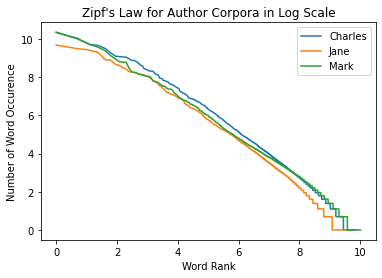

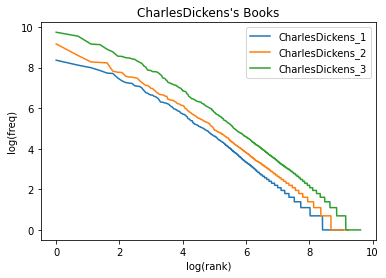

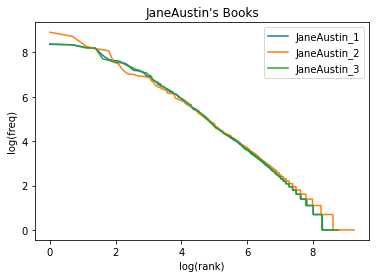

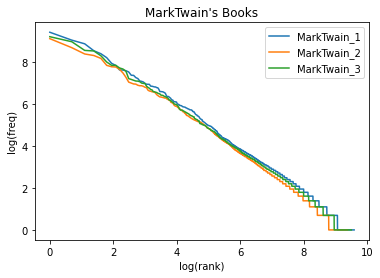

In [464]:
    
PlotZipf(author_corpus,"Author")   


In [465]:
# Type-Token Ratio

def TypeTokenRatio(author_books_list,sub_corpus,book_type= "author",format_plot="linear"):
        

        for ii in range(0,3):
            ind=3*ii
            merged_book = author_books_list[ind]+author_books_list[ind+1]+author_books_list[ind+2]
            merged_book= np.asarray(merged_book)
            corpus_size = len(merged_book)
            iter= corpus_size//sub_corpus
            
            type_size = []
            token_size= []
            for jj in range(0,iter):
                sliced_merged_book = merged_book[0:sub_corpus*(jj+1)]
                wr,fr= np.unique(sliced_merged_book,return_counts=True)
                type_size.append(len(wr))
                token_size.append((jj+1)*sub_corpus)
            wr,f= np.unique(merged_book,return_counts=True)
            type_size.append(len(wr))
            token_size.append(corpus_size)
            
            if book_type == "author":
                legend_list = ["Charles D.","Jane A.","Mark T."]
            elif book_type== "genre":
                legend_list = ["Horror","Fiction","Adventure"]
            
            
            if format_plot=="linear":
                plt.plot(token_size,type_size)
                plt.legend(legend_list)
                plt.title("Type-Token Ratio")
                plt.xlabel("Token Size")
                plt.ylabel("Type Size")

            elif format_plot=="log":
                plt.plot(np.log(token_size),np.log(type_size))
                plt.legend(legend_list)
                plt.title("Type-Token Ratio in Log Scale")
                plt.xlabel("TokenSize")
                plt.ylabel("Type Size")

        plt.show()
      
 
               

# Type Token Ratio for Author Corpora

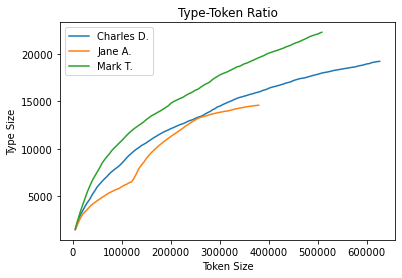

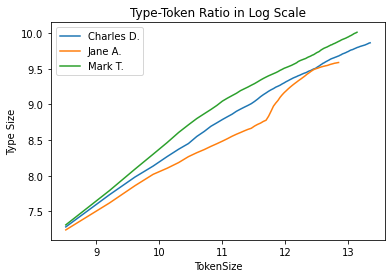

In [466]:
TypeTokenRatio(author_corpus,5000,format_plot="linear") 
TypeTokenRatio(author_corpus,5000,format_plot="log") 

In [467]:
# Type Token  Ratio By Author Book
def TypeTokenRatioBy(author_books_list,sub_corpus,book_type= "author"):
        
        all_types = []
        all_tokens= []
        for ii in range(0,3):
            
            for dd in range(3*ii,3*(ii+1)):
              
                boi=author_books_list[dd]
                boi= np.asarray(boi)
                corpus_size = len(boi)
                iter= corpus_size//sub_corpus
                
                type_size = []
                token_size= []
                for jj in range(0,iter):
                    sliced_boi = boi[0:sub_corpus*(jj+1)]
                    wr,fr= np.unique(sliced_boi,return_counts=True)
                    type_size.append(len(wr))
                    token_size.append((jj+1)*sub_corpus)
                wr,f= np.unique(boi,return_counts=True)
                type_size.append(len(wr))
                token_size.append(corpus_size)
                all_types.append(type_size)
                all_tokens.append(token_size)
 
                
                if book_type == "author":
                  legend_list = ["CharlesD_1","CharlesD_2","CharlesD_3","JaneA_1","JaneA_2","JaneA_3","MarkT_1","MarkT_2","MarkT_3"]
                elif book_type== "genre":
                    legend_list = ["Horror_1","Horror_2","Horror_3","Fiction_1","Fiction_2","Fiction_3","Adventure_1","Adventure_2","Adventure_3"]
                
              
                plt.plot(np.log(token_size),np.log(type_size))
            plt.title("Type Token Ration in Log Scale")
            legends=legend_list[3*ii:3*(ii+1)]
            plt.legend(legends)
            plt.show()
                
        # Best Fitting Line
        slopes=[]
        for tt in range(0,len(all_tokens)):
            x_ax= np.log(all_tokens[tt])
            y_ax= np.log(all_types[tt])
            theta= np.polyfit(x_ax, y_ax, 1)
            slopes.append(theta[0])

       
            
       
        for ii in range(0,len(all_types)):
            
            plt.plot(np.log(all_tokens[ii]),np.log(all_types[ii]))
        plt.title("Type Token Ratio in Log Scale")
        plt.legend(legend_list)
    #    arrow_style = {"head_width":0.1, "head_length":0.1, "color":"k"}
     #   plt.arrow(x=10, y=7.5, dx=0.01, dy=0.3, **arrow_style)
      #  plt.text(x=10.1,y=7.95, s=str(slopes[3])[0:6])
        
       # plt.arrow(x=12.5, y=8.9, dx=0.01, dy=0.45, **arrow_style)
        #plt.text(x=12.6,y=9.2, s=str(slopes[2])[0:6])
        
        #plt.arrow(x=10.5, y=9.3, dx=0.01, dy=-0.35, **arrow_style)
        #plt.text(x=10.5,y=9.4, s=str(slopes[6])[0:6])     
        
        plt.show()
        
      
               
                 
        return all_types, all_tokens,slopes
                



# Bookwise Type Token Ration for Authors

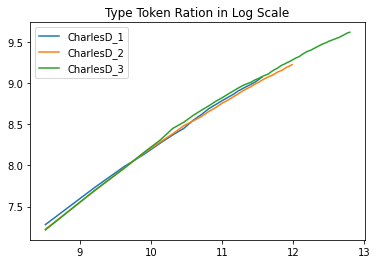

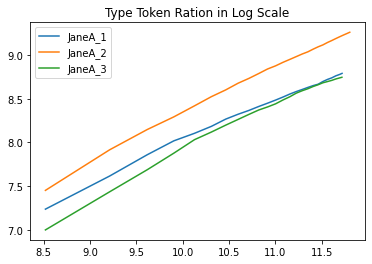

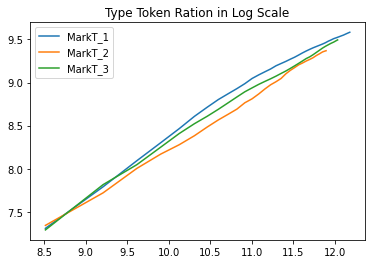

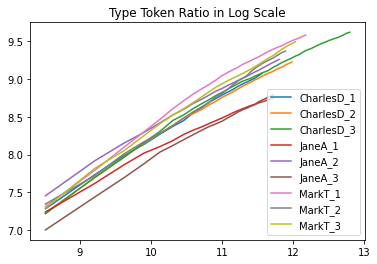

In [468]:
# Part i and h
all_types,all_tokens,slopes = TypeTokenRatioBy(author_corpus,5000,book_type="author")


In [469]:
slopes

[0.5805864609656438,
 0.5516520958188551,
 0.5144007277709988,
 0.46319578969855235,
 0.5284267393866788,
 0.5294720839951793,
 0.5950883757987248,
 0.614969423395088,
 0.6013583864779135]

# Experiments on Genre

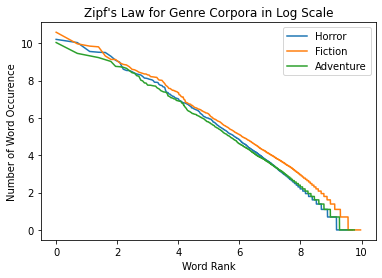

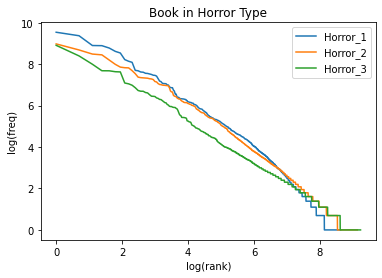

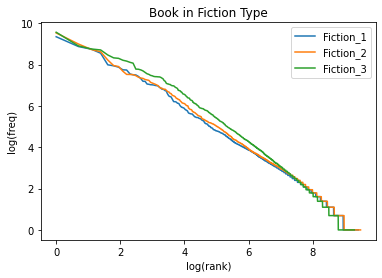

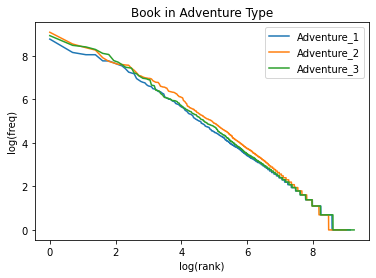

In [470]:
# Part f    
PlotZipf(genre_corpus,"Genre")  

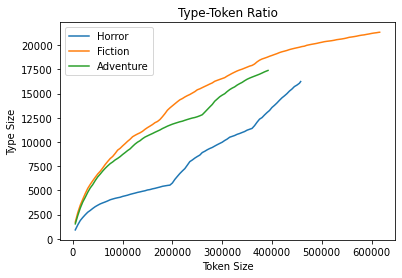

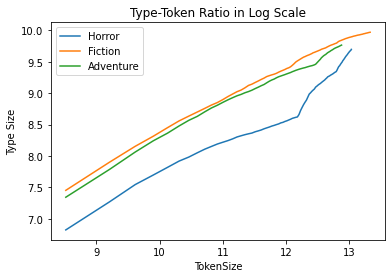

In [471]:
# Part g

TypeTokenRatio(genre_corpus,5000,book_type="genre", format_plot="linear") 
TypeTokenRatio(genre_corpus,5000,book_type="genre",format_plot="log") 

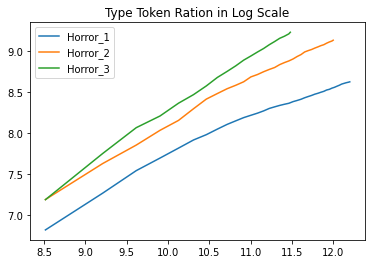

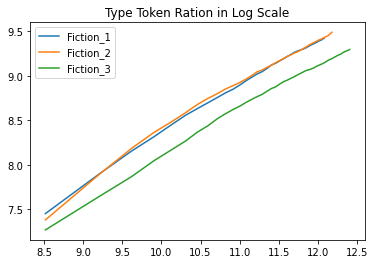

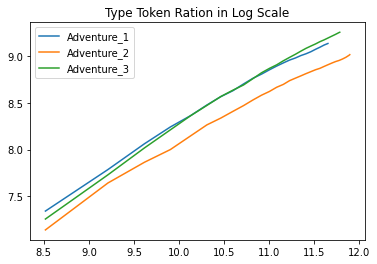

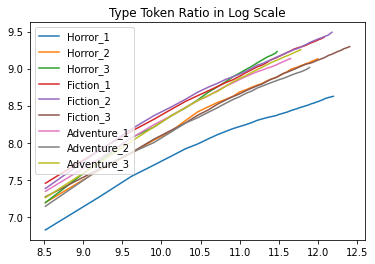

In [472]:
# Part i and h
all_types,all_tokens,slopes = TypeTokenRatioBy(genre_corpus,5000,book_type="genre")

In [473]:
slopes

[0.439991691571903,
 0.5406699291259836,
 0.6678185913539677,
 0.5316780543379558,
 0.5275824640595737,
 0.5077628207327238,
 0.558577187966934,
 0.5271380895940958,
 0.5943907043192368]

# **************** After Removal of Stop Words  **********************

# Zipf's Law for Author Corpora

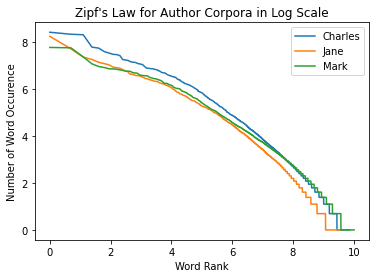

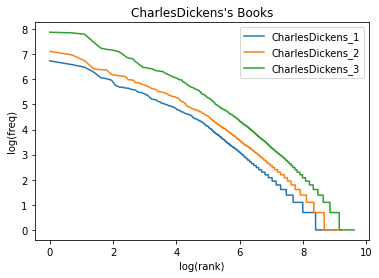

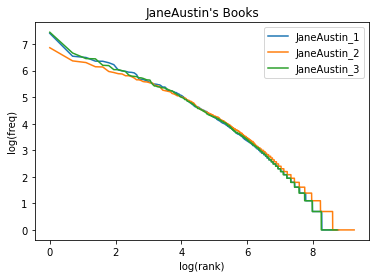

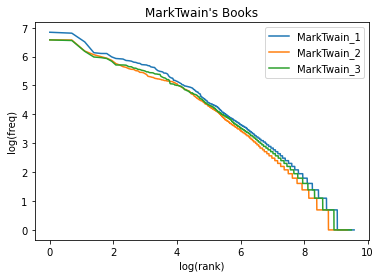

In [474]:
PlotZipf(author_corpus_sw,"Author")   

#  Type-Token Ratio without Stop Words

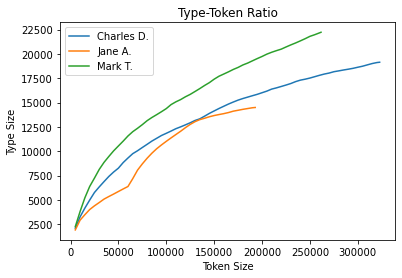

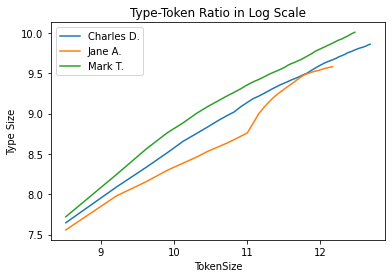

In [475]:
TypeTokenRatio(author_corpus_sw,5000,format_plot="linear") 
TypeTokenRatio(author_corpus_sw,5000,format_plot="log") 

#  Bookwise Type Token Ratio without Stop Words

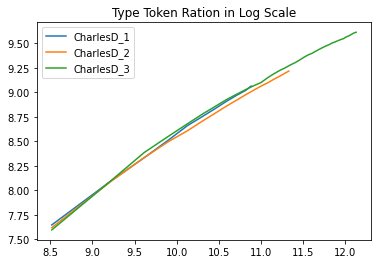

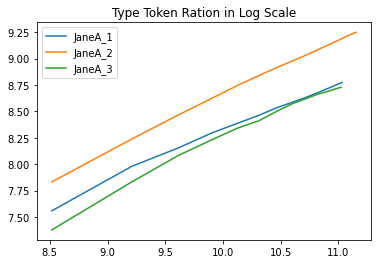

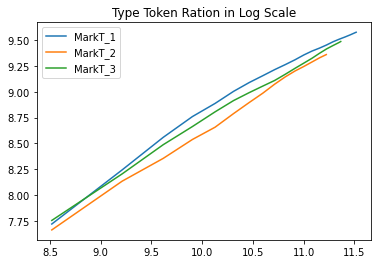

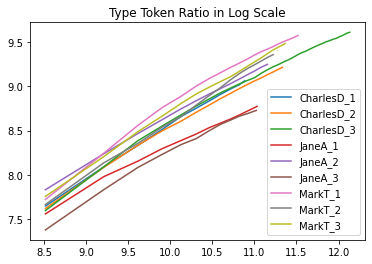

In [476]:
# Part i and h
all_types,all_tokens,slopes = TypeTokenRatioBy(author_corpus_sw,5000,book_type="author")

# ******** Experiments on Genre ************

#  Zipf's Law

#   Type-Token Ratio without Stop Words

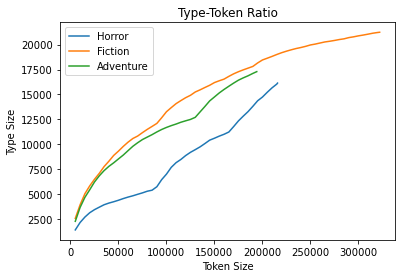

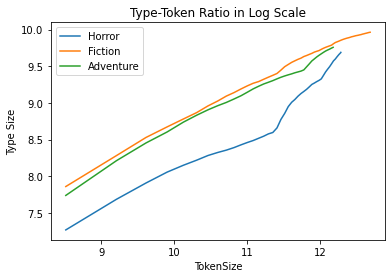

In [477]:
TypeTokenRatio(genre_corpus_sw,5000,book_type="genre",format_plot="linear") 
TypeTokenRatio(genre_corpus_sw,5000,book_type="genre", format_plot="log") 

#  Bookwise Type Token Ratio without Stop Words

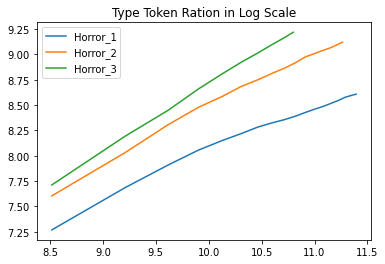

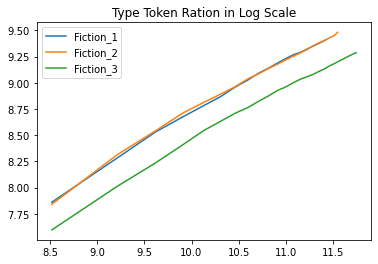

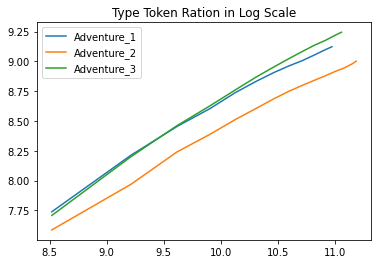

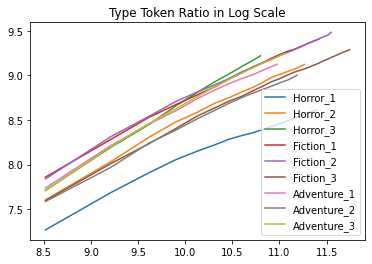

In [478]:
all_types,all_tokens,slopes = TypeTokenRatioBy(genre_corpus_sw,5000,book_type="genre")

 # Part m

In [ ]:
# Do not run this part withot creatin

Text(0.5, 1.0, "Zipf's Law in Random Text in Log Scale")

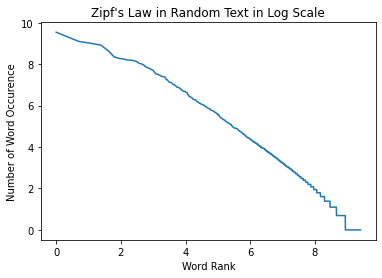

In [481]:
merged_book = author_corpus[5]+author_corpus[1]
merged_book= np.asarray(merged_book)
wr,fr= np.unique(merged_book,return_counts=True)
word_freq= np.sort(fr)
word_freq= word_freq[::-1]
word_rank= np.arange(1,len(wr)+1)
       
plt.plot(np.log(word_rank),np.log(word_freq))
            
plt.ylabel("Number of Word Occurence")
plt.xlabel("Word Rank")
plt.title("Zipf's Law in Random Text in Log Scale")


# END